## Stock Prediction using Machine Learning and Python | Machine Learning Training | Edureka  

https://www.youtube.com/watch?v=lncoLfue_Y4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.style.use('bmh')

### 1) Raw Data and EDA

In [2]:
dataset = pd.read_csv('data/Google_Stock_Price_Train.csv', index_col='Date', parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


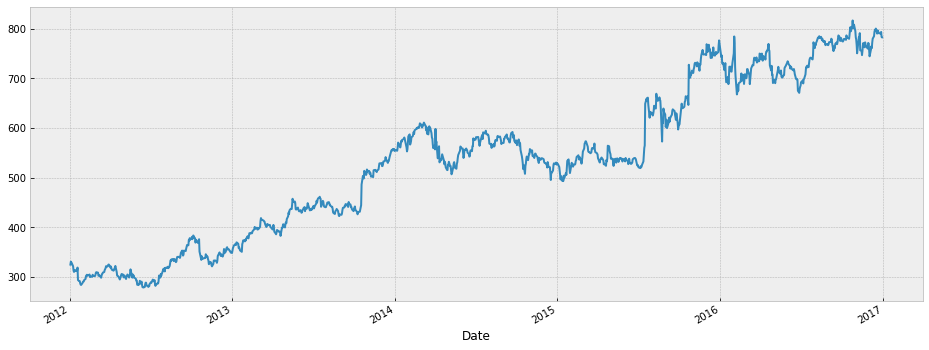

In [6]:
dataset['Open'].plot(figsize=(16, 6));

In [7]:
# Convert column 'a' of DataFrame
dataset['Close'] = dataset['Close'].str.replace(',', '').astype(float)
dataset['Volume'] = dataset['Volume'].str.replace(',', '').astype(float)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [9]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


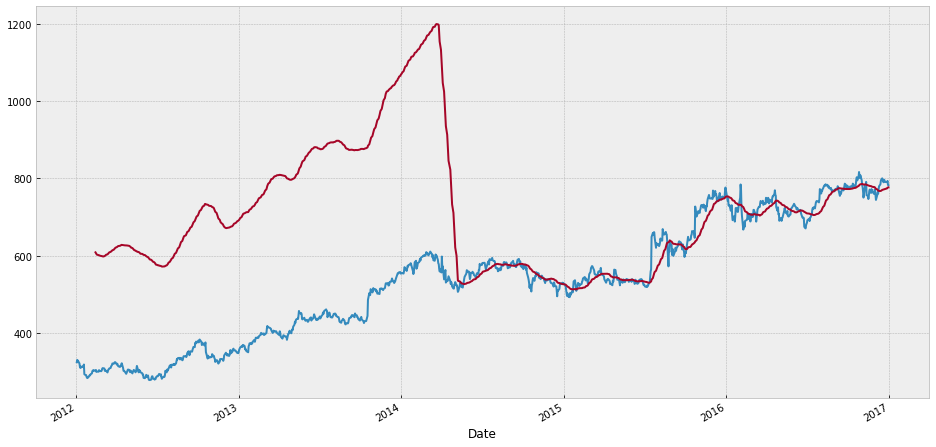

In [10]:
dataset['Open'].plot(figsize=(16, 8))
dataset.rolling(window=30).mean()['Close'].plot();

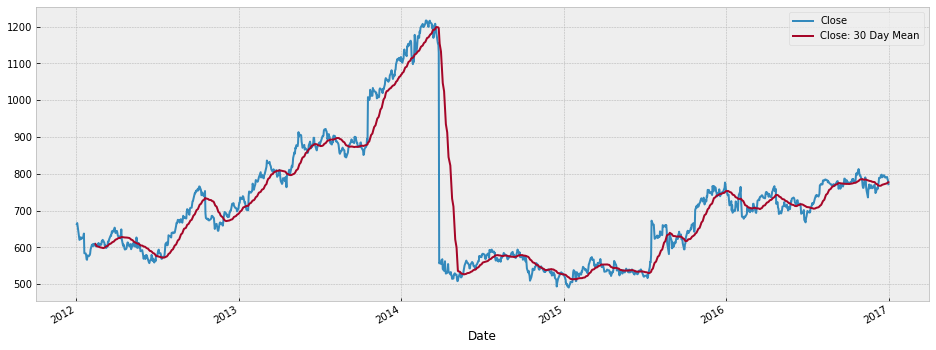

In [11]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close', 'Close: 30 Day Mean']].plot(figsize=(16, 6));

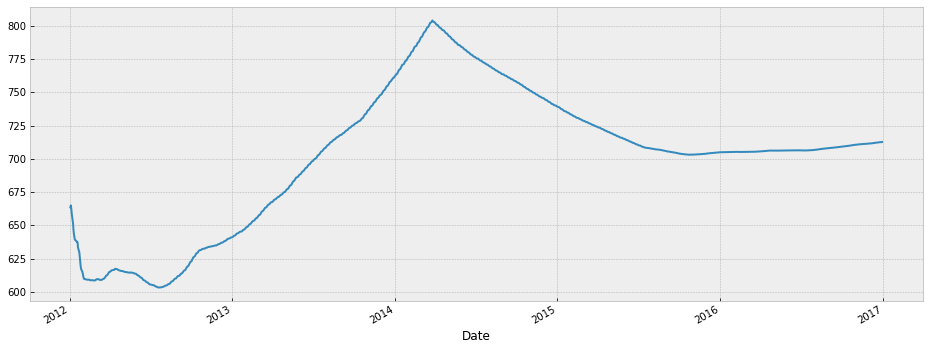

In [12]:
# Optional specify a minimum numer of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16, 6));

### 2) Data Preprocessing

In [13]:
training_set = dataset['Open']
training_set = pd.DataFrame(training_set)

In [14]:
training_set.shape[0]

1258

In [15]:
# Data cleaning
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [16]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
training_set

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04
...,...
2016-12-23,790.90
2016-12-27,790.68
2016-12-28,793.70


In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
a = training_set_scaled[60 - 60:60, 0].reshape(60, 1)

In [20]:
b = training_set_scaled[60 - 60:60, :]

In [21]:
a == b

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [22]:
# training_set_scaled[61 - 60:61, 0]

In [23]:
# training_set_scaled[62 - 60:62, 0]

In [24]:
# for i in range(60, training_set.shape[0]):
#     print(i)

### 3) Feature Extraction

In [25]:
# Building the RNN

# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [26]:
# Initializing the RNN
regressor = Sequential()

### 4) Training Neural Network: Optimizer | Regularization | Dropouts

In [27]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

In [28]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the training set
# 32 is a good number to begin experimenting with or use multiples of 32
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 18s 47ms/step - loss: 0.0948
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0039
Epoch 13/100
38/38 [====

### Visualization

In [29]:
# Making the predictions and visualizing the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('data/Google_Stock_Price_Test.csv', index_col='Date', parse_dates=True)

In [30]:
dataset_test

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"


In [31]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [32]:
real_stock_price

array([[789.63],
       [791.34],
       [794.48],
       [807.9 ],
       [809.97],
       [809.13],
       [808.15],
       [807.39],
       [811.22],
       [807.14],
       [806.21],
       [809.48],
       [806.91],
       [820.87],
       [825.9 ],
       [835.77],
       [838.  ],
       [841.95],
       [815.84],
       [801.25]])

In [33]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [34]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [35]:
# dataset_test['Close'] = dataset_test['Close'].str.replace(',','').astype(float)
dataset_test['Volume'] = dataset_test['Volume'].str.replace(',','').astype(float)

In [36]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
dtypes: float64(5)
memory usage: 960.0 bytes


In [37]:
test_set = dataset_test['Open']
test_set = pd.DataFrame(test_set)

In [38]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [39]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [40]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


In [41]:
predicted_stock_price

,0
0,762.463928
1,759.774231
2,759.819519
3,761.032654
4,764.215210
5,769.938965
6,775.372925
7,777.881897
8,778.455872
9,778.192444


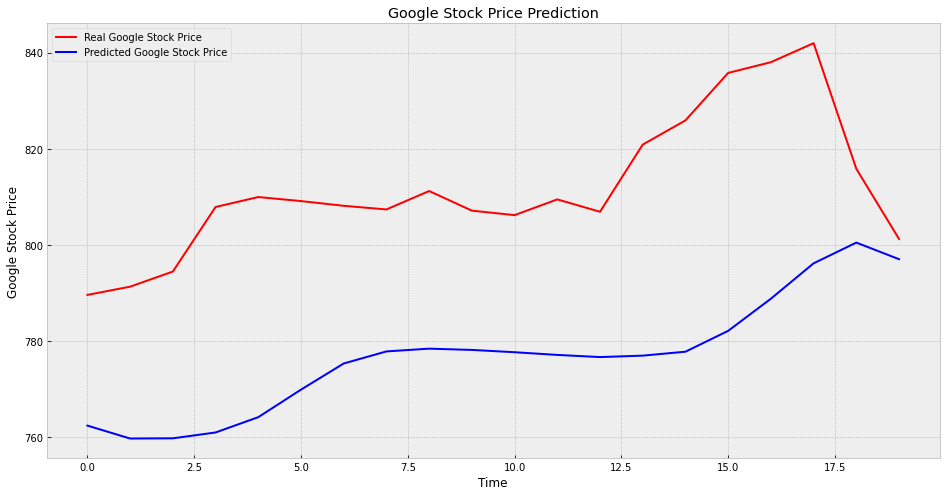

In [42]:
# Visualizing the results
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(real_stock_price, color='red', label='Real Google Stock Price')
ax.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
ax.set_title('Google Stock Price Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('Google Stock Price')
ax.legend();